# 8 Gradient descent with Momentum
## Momentum with Different Polynomials
<p>We'll explore how momentum helps avoiding getting stuck in local-min or overshooting.</p>
<ul>
    <li><a href="#saddle">Saddle points</a></li>
    <li><a href="#local">Local minima</a></li>
    <li><a href="#noise">Noise</a></li>
</ul>

In [1]:
import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [2]:
# Helper functions
# Plot a cubic function and the parameters obtained via Gradient Descent.

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values 
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction 
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='parameter values')

    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [3]:
# Plot the fourth order function and the parameter values
def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    
    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [ ]:
# This is a custom component. 
# It will behave like a single parameter value, so we can use PyTorch's build-in optimizers.

# Create a linear model
class one_param(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [5]:
# We create a 1-parameter object `w`, when we call the object with an input of one,
# it will behave like an individual parameter value. i.e w(1) is analogous to w 
w = one_param(1, 1)

## <a name="saddle" id="saddle">Saddle Points</a>

In [6]:
# Function to output a cubic
def cubic(y_hat):
    return y_hat ** 3   

### No momentum

In [16]:
# Optimizer with no-momentum term
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

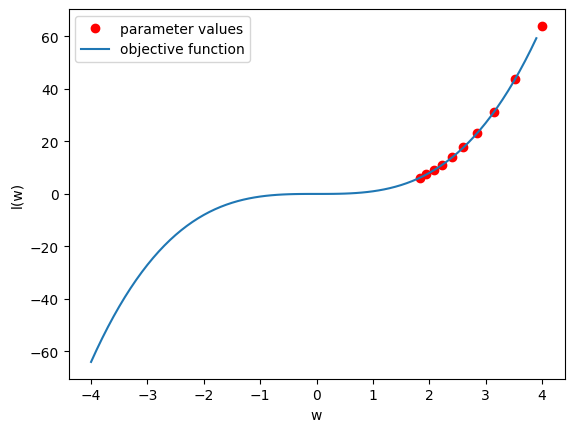

In [15]:
# plot_cubic will run various iterations of SGD
# Observe how the parameter values get stuck in the saddle point.
plot_cubic(w, optimizer)

### Adding momentum

In [17]:
# Create an optimizer with momentum term = 0.9
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

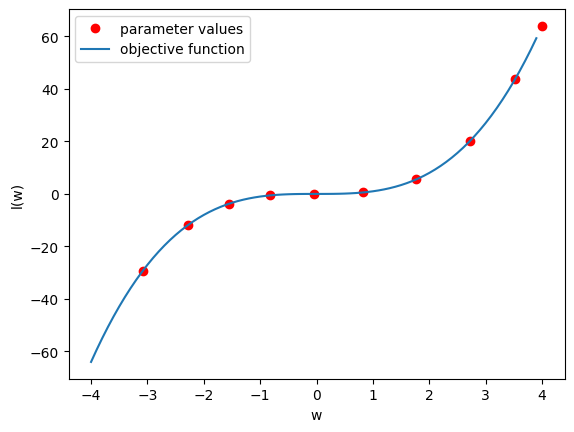

In [18]:
plot_cubic(w, optimizer)

## <a name="local" id="local">Local Minima</a>

In [19]:
# Create a function to calculate the fourth order polynomial 
# Local minimum at 4 and a global minimum at -2.

def fourth_order(yhat): 
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

### No momentum

/tmp/ipykernel_2139833/3105109498.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


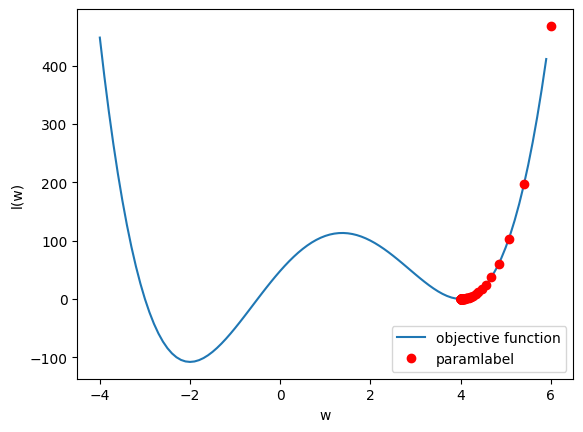

In [ ]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)
# The parameter values get stuck at local minimum

### Adding momentum

/tmp/ipykernel_2139833/3105109498.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


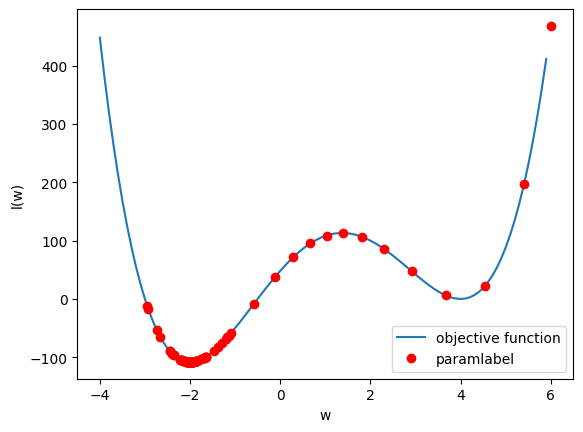

In [21]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

## <a name="noise" id="noise">Noise</a>

### No momentum

/tmp/ipykernel_2139833/3105109498.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


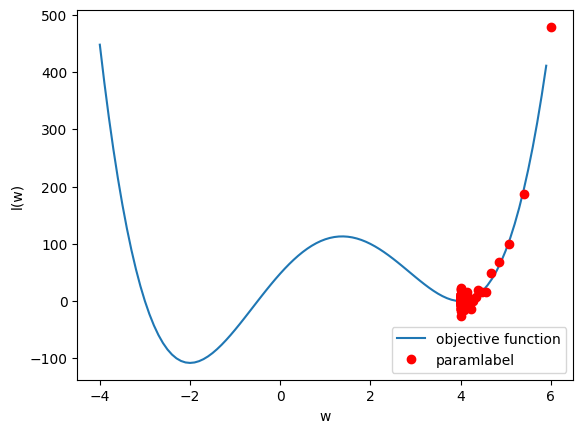

In [26]:
# Create a 4th order polynomial with local minimum at 4 and a global minimum at -2. 
# We will add noise to the function.

# Make the prediction without momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

### Adding momentum

/tmp/ipykernel_2139833/3105109498.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


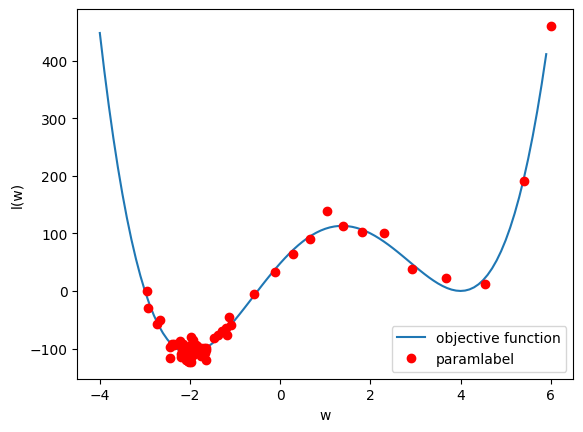

In [27]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer, std=10)